In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

25 25
3.420888377458021 0.0012544166747039563


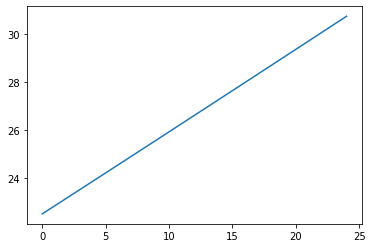

In [17]:
etamax = 10.0
delta = 0.1

nsteps = (etamax*1.0)/delta
fname = "test1_G.dat"
df = np.loadtxt(fname)

fitmin = int(0.75*nsteps)
fitmax = int(nsteps) 
s0_steps = 2

data = df[s0_steps][fitmin:fitmax]

eta_values = np.arange(0.75*etamax, etamax, step=delta)

print(len(eta_values), len(data))
if len(data) != len(eta_values): print("uh oh")
    
res = stats.linregress(eta_values, data)
inter, error = res.slope, res.stderr

plt.plot(data)

print(inter,error)

In [147]:
def getIntercept(etamax, delta, g):
    nsteps = (etamax*1.0)/delta
    
    del_str = str(delta)[2:]
    eta_str = str(int(etamax))
    fname = "data/surface/G"+g+"_"+eta_str+"_"+del_str+".dat"
    df = np.loadtxt(fname)
    
    fitmin = int(0.75*nsteps)
    fitmax = int(nsteps) 
    s0_steps = 2
    up_per = 1
    bot_per = 0.75
    
    
    data = df[s0_steps][fitmin:fitmax]
    eta_values = np.arange(bot_per*etamax, up_per*etamax, step=delta)

    if len(data) != len(eta_values): 
        eta_values = np.arange(bot_per*etamax, up_per*etamax - delta, step=delta)

    if len(data) != len(eta_values): 
        print("uh oh:", delta, etamax)
        print(len(data), len(eta_values))
        return [-1,-1]
    
    res = stats.linregress(eta_values, data)
#     print(res.slope, res.stderr)
    return [res.slope, res.stderr]

In [142]:
getIntercept(10, 0.05)

1.8311511668957692 0.0008432730476751496


[1.8311511668957692, 0.0008432730476751496]

In [161]:
mdeltas =[10,     10,    20,    20,    30,     40,    50,     60,    60,   70]
deltas = [0.0125, 0.016, 0.025, 0.032, 0.0375, 0.05, 0.0625, 0.075, 0.08, 0.1]

for gvar in ["3", "4", "5", "6"]:
    ints = []
    for i, d in enumerate(deltas): 
        for m in range(0, mdeltas[i], 10):
            p = getIntercept(m+10, d, gvar)
            ints.append([round(1.0/(m+10), 5), round(d,5), round(p[0],5), round(p[1],5)])

    np.savetxt("data/intercepts_G"+gvar+"_python.csv", 
        ints,
       delimiter =", ")